<p style="text-align: center;"><span style="color: #ff0000;"><strong><span style="font-size: x-large;">
    ANEXO XXX: Anillos Algebraicos</span></strong></span></p>

<p style="text-align: center;"><span style="color: black;"><strong><span style="font-size: x-large;">Realizado por:</span></strong></span></p>
<p style="text-align: center;"><span style="color: black;"><strong><span style="font-size: x-large;">Gabriel Vacaro Goytia</span></strong></span></p>
<p style="text-align: center;"><span style="color: black;"><strong><span style="font-size: x-large;">Ignacio Warleta Murcia</span></strong></span></p>

Tras  comprender de forma teórica que son los anillos algebraicos, sus propiedades, casos concretos como anillos polinomiales y otros conceptos tales como anillos ideales o anillos cocintes, procederemos a realizar una implementación de los mismos, en pos de familiarizarnos con ellos mediante la práctica.


# Índice

1. [Introducción](#1.-Introducción)
2. [Configuración previa](#2.-Configuración-previa)
3. [Concepto de anillo](#3.-Concepto-de-anillo)
    - [Anillo unitario](#3.1-Anillo-unitario)
    - [Anillo conmutativo](#3.2-Anillo-conmutativo)
4. [Anillo polinómico](#4.-Anillo-polinomico)
    - [Anillo polinómico multivariable](#4.1-Anillo-polinomico-multivariable)
    - [Anillo ideal](#5.-Anillo-ideal)
5. [Retículos sobre anillos](#7.-Reticulos-sobre-anillos)

---
# 1. Introducción


En este anexo se presenta la implementacion relativa al apartado 4.2 "Retículos basados en anillos" del TFG, donde haremos uso de ejemplos sencillos para comprender los conceptos relativos a este apartado. Este cuaderno tiene como objetivo complementar de forma práctica a la teoría planteada en el TFG.



---
# 2. Configuración previa

In [98]:
#Paquetes a importar
import matplotlib.pyplot as plt


In [5]:
#Funciones auxiliares utilizadas

---

# 3. Concepto de anillo

En álgebra, un **anillo** es una estructura algebraica consistente en un conjunto equipado con dos operaciones binarias: la **adición** (+) y la **multiplicación** (·), cada una de estas operaciones deberá cumplir ciertas reglas.

A continuación implementaremos una clase en **python** para definir el objeto *Ring*, y comprobaremos sus propiedades definidas en el documento principal mediante unos sencillos tests que probarán todas las reglas que deben cumplir ambas operacioens binarias para considerar el anillo como válido.


In [6]:
class Ring:
    def __init__(self, elements , add, mul, zero, one=None):
        """
        Representa un anillo algebraico.
        
        :param elements: Conjunto de elementos del anillo.
        :param add: Función binaria que define la adición.
        :param mul: Función binaria que define la multiplicación.
        :param zero: Elemento neutro aditivo.
        :param one: (Opcional) Elemento neutro multiplicativo.
        """
        self.elements = set(elements)
        self.add = add
        self.mul = mul
        self.zero = zero
        self.one = one

        if zero not in elements:
            raise ValueError("El elemento neutro aditivo debe estar en el conjunto de elementos.")

        if one and one not in elements:
            raise ValueError("El elemento neutro multiplicativo debe estar en el conjunto de elementos.")

    # Propiedades de la suma
    def is_closed_under_addition(self):
        return all(self.add(a, b) in self.elements for a in self.elements for b in self.elements)

    def is_addition_associative(self):
        return all(self.add(self.add(a, b), c) == self.add(a, self.add(b, c))
                   for a in self.elements for b in self.elements for c in self.elements)

    def is_addition_commutative(self):
        return all(self.add(a, b) == self.add(b, a) for a in self.elements for b in self.elements)

    def has_additive_identity(self):
        return all(self.add(a, self.zero) == a for a in self.elements)

    def has_additive_inverses(self):
        return all(any(self.add(a, b) == self.zero for b in self.elements) for a in self.elements)

    # Propiedades del producto 
    def is_closed_under_multiplication(self):
        return all(self.mul(a, b) in self.elements for a in self.elements for b in self.elements)

    def is_multiplication_associative(self):
        return all(self.mul(self.mul(a, b), c) == self.mul(a, self.mul(b, c))
                   for a in self.elements for b in self.elements for c in self.elements)

    def is_distributive(self):
        return all(
            self.mul(a, self.add(b, c)) == self.add(self.mul(a, b), self.mul(a, c)) and
            self.mul(self.add(a, b), c) == self.add(self.mul(a, c), self.mul(b, c))
            for a in self.elements for b in self.elements for c in self.elements
        )

    # FUNCIONES PARA ANILLOS UNITARIOS
    def has_multiplication_identity(self):
        return all(self.mul(a, self.one) == a for a in self.elements)

    def is_unital_ring(self):
        return Ring.has_multiplication_identity(self)
        
    # FUNCIONES PARA ANILLOS CONMUTATIVOS
    def is_multiplication_conmutative(self):
        return all(self.mul(a, b) == self.mul(b, a) for a in self.elements for b in self.elements)

    def is_conmutative_ring(self):
        return Ring.is_multiplication_conmutative(self)

    # Método para verificar todas las propiedades del anillo
    def test_ring_properties(self):
        print("Propiedades de la suma")
        print("  ¿Cerradura bajo la adición?:", self.is_closed_under_addition())
        print("  ¿La suma es asociativa?:", self.is_addition_associative())
        print("  ¿La suma es conmutativa?:", self.is_addition_commutative())
        print("  ¿Tiene elemento neutro aditivo?:", self.has_additive_identity())
        print("  ¿Todos los elementos tienen inverso aditivo?:", self.has_additive_inverses())
        
        print("\nPropiedades del producto")
        print("  ¿Cerradura bajo la multiplicación?:", self.is_closed_under_multiplication())
        print("  ¿El producto es asociativo?:", self.is_multiplication_associative())
        print("  ¿El producto es distributivo respecto a la suma?:", self.is_distributive())


In [7]:
# Ejemplo básico: Anillo de enteros módulo 5
elements = {0, 1, 2, 3, 4}
add = lambda a, b: (a + b) % 5
mul = lambda a, b: (a * b) % 5
zero = 0

# Crear el anillo
ring_mod_5 = Ring(elements, add, mul, zero)

# Probar las propiedades del anillo
ring_mod_5.test_ring_properties()

Propiedades de la suma
  ¿Cerradura bajo la adición?: True
  ¿La suma es asociativa?: True
  ¿La suma es conmutativa?: True
  ¿Tiene elemento neutro aditivo?: True
  ¿Todos los elementos tienen inverso aditivo?: True

Propiedades del producto
  ¿Cerradura bajo la multiplicación?: True
  ¿El producto es asociativo?: True
  ¿El producto es distributivo respecto a la suma?: True


In [8]:
# Ejemplo básico: Esto NO es un Anillo
"""
En este caso no se cumplen:
    -La cerradura bajo adicion, un ejemplo es: 2+2 mod 5 = 4, y 4 no pertenece al conjunto de elementos.
    -El elemento neutro aditivo, un ejemplo es: 5+0 mod 5 = 5 mod 5 = 0. Distinto de 5.
    -Inverso aditivo, un ejemplo es: el inverso de 1 en el conjunto debería ser 4, pues 1+4 mod 5 = 0, pero el 4 no existe en el conjunto.
    -Ceradura bajo multiplicación, un ejemplo es: 2*2 mod 5 = 4, que no existe en el conjunto.

"""
elements = {0, 1, 2, 3, 5}
add = lambda a, b: (a + b) % 5
mul = lambda a, b: (a * b) % 5
zero = 0

# Crear el anillo
not_ring_mod_5 = Ring(elements, add, mul, zero)

# Probar las propiedades del anillo
ring_mod_5.test_ring_properties()


Propiedades de la suma
  ¿Cerradura bajo la adición?: True
  ¿La suma es asociativa?: True
  ¿La suma es conmutativa?: True
  ¿Tiene elemento neutro aditivo?: True
  ¿Todos los elementos tienen inverso aditivo?: True

Propiedades del producto
  ¿Cerradura bajo la multiplicación?: True
  ¿El producto es asociativo?: True
  ¿El producto es distributivo respecto a la suma?: True


## 3.1 Anillo unitario


Entendemos un **anillo unitario**, como un **anillo** en el que **SI** existe el **elemento neutro multiplicativo**.

Es importante especificar antes el elemento neutro multiplicativo (atributo **one**) en el anillo, en caso contrario se producirá un **error**. Usaremos la siguiente función de la clase *Ring* definida anteriormente.

In [9]:
ring_mod_5.one = 1
print("El anillo de elementos: ",ring_mod_5.elements)
print("¿Es un anillo unitario?")
print(Ring.is_unital_ring(ring_mod_5))

not_ring_mod_5.one = 1
print("El conjunto de elementos: ",not_ring_mod_5.elements)
print("¿en caso de ser un anillo, sería unitario?")
print(Ring.is_unital_ring(not_ring_mod_5))

El anillo de elementos:  {0, 1, 2, 3, 4}
¿Es un anillo unitario?
True
El conjunto de elementos:  {0, 1, 2, 3, 5}
¿en caso de ser un anillo, sería unitario?
False


## 3.2 Anillo conmutativo

Entendemos un **anillo conmutativo** como un **anillo** en el que **sí** se cumple la propiedad **conmutativa** del producto, es decir:

$$
a \cdot b \mod c = b \cdot a \mod c
$$

En otras palabras, el orden de los factores no altera el producto en el **anillo**

In [10]:
print("El anillo de elementos: ",ring_mod_5.elements)
print("¿Es un anillo conmutativo?")
print(Ring.is_conmutative_ring(ring_mod_5))

not_ring_mod_5.one = 1
print("El conjunto de elementos: ",not_ring_mod_5.elements)
print("¿En caso de ser un anillo, sería conmutativo?")
print(Ring.is_conmutative_ring(not_ring_mod_5))

El anillo de elementos:  {0, 1, 2, 3, 4}
¿Es un anillo conmutativo?
True
El conjunto de elementos:  {0, 1, 2, 3, 5}
¿En caso de ser un anillo, sería conmutativo?
True


---

# 4. Anillo polinomico

Una vez entendido el concepto de anillo, veremos un caso concreto de estos, **los anillos polinómicos**. Estos constituyen la base sobre la cual se definen los retículos sobre anillos y los módulos sobre anillos.

Los **anillos polinómicos** son una estructura matemática formada por polinomios con coeficientes de un anillo dado, combinados bajo las operaciones de suma y multiplicación de polinomios. El anillo de polinomios en una variable $x$, denotado por $R[x]$, es el conjunto de expresiones llamadas polinomios en $x$, que tienen la forma:

$$
f(x) = a_n x^n + a_{n-1} x^{n-1} + \ldots + a_1 x + a_0,
$$

donde $n \geq 0$ es el grado del polinomio, $a_i \in R$ para $i = 0, 1, \ldots, n$, y $x$ es una variable formal.


In [42]:
class PolynomialRing:
    """
    Representa un anillo de polinomios R[x] basado en un anillo R.
    """

    def __init__(self, base_ring):
        """
        Inicializa el anillo de polinomios a partir de un anillo base.

        :param base_ring: Un objeto de la clase Ring que representa el anillo base R.
        """
        self.base_ring = base_ring  # Guarda el anillo base como atributo para usarlo en operaciones

    @property
    def base_elements(self):
        """Devuelve los elementos del anillo base."""
        return self.base_ring.elements
        
    def add(self, p, q):
        """
        Realiza la suma de dos polinomios p y q.

        :param p: Lista de coeficientes del primer polinomio.
        :param q: Lista de coeficientes del segundo polinomio.
        :return: Lista de coeficientes del polinomio suma.
        """
        degree = max(len(p), len(q))  # Determina el grado máximo de los dos polinomios
        result = [self.base_ring.zero] * degree  # Crea una lista de ceros del tamaño adecuado
        for i in range(degree):  # Itera sobre cada término hasta el grado máximo
            a = p[i] if i < len(p) else self.base_ring.zero  # Coeficiente de p o 0 si no existe
            b = q[i] if i < len(q) else self.base_ring.zero  # Coeficiente de q o 0 si no existe
            result[i] = self.base_ring.add(a, b)  # Suma los coeficientes usando la suma del anillo base
        return result  # Retorna el polinomio resultante

    def mul(self, p, q):
        """
        Realiza la multiplicación de dos polinomios p y q.

        :param p: Lista de coeficientes del primer polinomio.
        :param q: Lista de coeficientes del segundo polinomio.
        :return: Lista de coeficientes del polinomio producto.
        """
        degree = len(p) + len(q) - 1  # Grado del producto es suma de los grados menos 1
        result = [self.base_ring.zero] * degree  # Inicializa una lista para el resultado
        for i in range(len(p)):  # Itera sobre los coeficientes de p
            for j in range(len(q)):  # Itera sobre los coeficientes de q
                # Multiplica los coeficientes y acumula en la posición adecuada
                result[i + j] = self.base_ring.add(
                    result[i + j],  # Acumula el valor existente
                    self.base_ring.mul(p[i], q[j])  # Producto de coeficientes
                )
        return result  # Retorna el polinomio resultante

    def display_polynomial(self, p):
        """
        Convierte un polinomio representado como lista de coeficientes en una cadena legible.

        :param p: Lista de coeficientes del polinomio.
        :return: Cadena que representa el polinomio.
        """
        terms = []  # Lista para almacenar términos como cadenas
        for i, coeff in enumerate(p):  # Itera sobre cada coeficiente
            if coeff != self.base_ring.zero:  # Ignora términos con coeficiente 0
                # Agrega el término con el formato adecuado ("coef x^i")
                terms.append(f"{coeff}x^{i}" if i > 0 else str(coeff))
        return " + ".join(terms) if terms else "0"  # Junta los términos o retorna "0" si no hay términos

    def is_commutative(self):
        """
        Verifica si el anillo de polinomios es conmutativo.

        :return: True si el anillo base es conmutativo, False en caso contrario.
        """
        return self.base_ring.is_multiplication_conmutative()

    def has_multiplicative_identity(self):
        """
        Verifica si el anillo de polinomios tiene un elemento neutro multiplicativo.

        :return: True si el anillo base tiene un elemento neutro multiplicativo, False en caso contrario.
        """
        return self.base_ring.has_multiplication_identity()

    def is_integral_domain(self):
        """
        Verifica si el anillo de polinomios es un dominio entero.

        :return: True si el anillo base es un dominio entero, False en caso contrario.
        """
        if not self.base_ring.is_distributive():  # Verifica la propiedad distributiva en el anillo base
            return False
        for a in self.base_ring.elements:  # Recorre cada elemento del anillo base
            for b in self.base_ring.elements:
                # Si hay divisores de cero, no es un dominio entero
                if a != self.base_ring.zero and b != self.base_ring.zero:
                    if self.base_ring.mul(a, b) == self.base_ring.zero:
                        return False
        return True  # Es un dominio entero si no hay divisores de cero

    def test_polynomial_ring(self):
        """
        Prueba las propiedades y operaciones básicas del anillo de polinomios.
        """
        # Verifica las propiedades fundamentales
        print("¿Es conmutativo?", self.is_commutative())
        print("¿Tiene elemento neutro multiplicativo?", self.has_multiplicative_identity())
        print("¿Es un dominio entero?", self.is_integral_domain())



In [12]:
# Crear un anillo polinomial sobre el anillo anteriormente definido
poly_ring = PolynomialRing(ring_mod_5)

# Probar las propiedades del anillo de polinomios
print("anillo base: ",ring_mod_5.elements)
print("Ejemplos de polinomios pertenecientes al anillo: ")

p = [1, 2, 3]  # Representa el polinomio 1 + 2x + 3x^2
q = [0, 1]     # Representa el polinomio x

print(f"p = {poly_ring.display_polynomial(p)}")  # Muestra p
print(f"q = {poly_ring.display_polynomial(q)}")  # Muestra q

print("Operaciones entre ambos polinomios: ")

# Realizar operaciones con polinomios
sum_result = poly_ring.add(p, q)  # Suma de p y q
mul_result = poly_ring.multiply(p, q)  # Producto de p y q

# Mostrar los resultados de las operaciones
print(f"p + q = {poly_ring.display_polynomial(sum_result)}")  # Muestra la suma
print(f"p * q = {poly_ring.display_polynomial(mul_result)}")  # Muestra el producto


anillo base:  {0, 1, 2, 3, 4}
Ejemplos de polinomios pertenecientes al anillo: 
p = 1 + 2x^1 + 3x^2
q = 1x^1
Operaciones entre ambos polinomios: 
p + q = 1 + 3x^1 + 3x^2
p * q = 1x^1 + 2x^2 + 3x^3


In [13]:
# Crear un anillo polinomial sobre el anillo anteriormente definido
poly_ring = PolynomialRing(ring_mod_5)

# Probar las propiedades del anillo de polinomios
print("anillo base: ",ring_mod_5.elements)

# Probar las propiedades del anillo de polinomios
poly_ring.test_polynomial_ring()

anillo base:  {0, 1, 2, 3, 4}
¿Es conmutativo? True
¿Tiene elemento neutro multiplicativo? True
¿Es un dominio entero? True


## 4.1 Anillo polinomico multivariable

Si tomamos $n$ variables $x_1, x_2, \dots, x_n$, obtenemos $R[x_1, x_2, \dots, x_n]$, el conjunto de polinomios donde los monomios son productos de potencias de $x_1, x_2, \dots, x_n$, y los coeficientes están en el anillo base $R$. 

Por ejemplo, en el caso de dos variables, el anillo de polinomios sería $R[x, y]$, y un polinomio en este anillo podría tener la siguiente forma:

$$
f(x, y) = a_{2,1} x^2 y + a_{1,0} x + a_{0,2} y^2 + a_{0,0}
$$

donde los coeficientes $a_{k_1, k_2} \in R$ corresponden a los coeficientes de cada término, y $x$ y $y$ son las variables. Los exponentes de las variables son no negativos, y representan los grados de los monomios en sus respectivas variables.


In [14]:
class PolynomialRingMultipleVars:
    def __init__(self, base_ring, num_vars):
        """
        Crea un anillo de polinomios con varias variables sobre un anillo base.
        
        :param base_ring: Un anillo base (por ejemplo, Z/5Z).
        :param num_vars: El número de variables en el anillo de polinomios.
        """
        self.base_ring = base_ring
        self.num_vars = num_vars

    def display_polynomial(self, polynomial):
        """
        Muestra el polinomio en formato legible. El polinomio es representado
        como un diccionario, donde las claves son los exponentes de las variables,
        y los valores son los coeficientes.
        
        :param polynomial: El polinomio a mostrar, como diccionario de coeficientes.
        :return: Una cadena representando el polinomio.
        """
        terms = []
        for (exp_x, exp_y), coeff in sorted(polynomial.items(), key=lambda item: (-item[0][0], -item[0][1])):
            if coeff != 0:
                # Eliminar las potencias 0 de las variables
                if exp_x == 0 and exp_y == 0:
                    term = f"{coeff}"  # Solo el coeficiente si ambas son 0
                elif exp_x == 0:
                    term = f"{coeff}y^{exp_y}"  # Solo mostrar y si x está elevado a 0
                elif exp_y == 0:
                    term = f"{coeff}x^{exp_x}"  # Solo mostrar x si y está elevado a 0
                else:
                    term = f"{coeff}x^{exp_x}y^{exp_y}"  # Mostrar ambas x y y si ambas tienen exponente

                # Eliminar el exponente 1 para las variables y mejorar la legibilidad
                if exp_x == 1:
                    term = term.replace("x^1", "x")
                if exp_y == 1:
                    term = term.replace("y^1", "y")
                
                # Eliminar coeficientes 1 o -1
                if coeff == 1:
                    term = term.replace("1", "")
                elif coeff == -1:
                    term = term.replace("-1", "-")

                terms.append(term)

        # Ordenar los términos por los exponentes de x y luego por los de y
        return " + ".join(terms) if terms else "0"  # Unir los términos con "+" o devolver 0

    def add(self, p1, p2):
        """
        Realiza la suma de dos polinomios en varias variables.
        
        :param p1: Primer polinomio, como diccionario de coeficientes.
        :param p2: Segundo polinomio, como diccionario de coeficientes.
        :return: El polinomio resultante de la suma.
        """
        result = {}
        # Sumar coeficientes correspondientes
        all_terms = set(p1.keys()).union(set(p2.keys()))
        for term in all_terms:
            result[term] = self.base_ring.add(p1.get(term, 0), p2.get(term, 0))
        return result

    def mul(self, p1, p2):
        """
        Realiza la multiplicación de dos polinomios en varias variables.
        
        :param p1: Primer polinomio, como diccionario de coeficientes.
        :param p2: Segundo polinomio, como diccionario de coeficientes.
        :return: El polinomio resultante de la multiplicación.
        """
        result = {}
        # Multiplicar cada término de p1 con cada término de p2
        for (exp_x1, exp_y1), coeff1 in p1.items():
            for (exp_x2, exp_y2), coeff2 in p2.items():
                new_exp_x = exp_x1 + exp_x2
                new_exp_y = exp_y1 + exp_y2
                new_coeff = self.base_ring.mul(coeff1, coeff2)
                if (new_exp_x, new_exp_y) in result:
                    result[(new_exp_x, new_exp_y)] = self.base_ring.add(result[(new_exp_x, new_exp_y)], new_coeff)
                else:
                    result[(new_exp_x, new_exp_y)] = new_coeff
        return result

In [15]:
# Crear un anillo de polinomios con 2 variables sobre Z/5Z
poly_ring = PolynomialRingMultipleVars(ring_mod_5, 2)

# Crear dos polinomios de ejemplo con dos variables (x, y)
p1 = {(2, 0): 2, (1, 1): 3, (0, 2): 4}  # p1 = 2x^2 + 3xy + 4y^2
p2 = {(1, 0): 1, (0, 1): 1}  # p2 = x + y

# Mostrar los polinomios
print(f"Polinomio p1: {poly_ring.display_polynomial(p1)}")
print(f"Polinomio p2: {poly_ring.display_polynomial(p2)}")

# Sumar los polinomios
sum_polynomial = poly_ring.add(p1, p2)
print(f"p1 + p2: {poly_ring.display_polynomial(sum_polynomial)}")

# Multiplicar los polinomios
product_polynomial = poly_ring.mul(p1, p2)
print(f"p1 * p2: {poly_ring.display_polynomial(product_polynomial)}")

Polinomio p1: 2x^2 + 3xy + 4y^2
Polinomio p2: x + y
p1 + p2: 2x^2 + 3xy + x + 4y^2 + y
p1 * p2: 2x^3 + 2xy^2 + 4y^3


---

# 5. Anillo ideal

Un **ideal** es un subconjunto especial de un anillo que generaliza la idea de divisibilidad. Un ideal tiene dos propiedades fundamentales de **suma cerrada** y **multiplicación absorbente** ya comentadas en el documento principal.

Los ideales permiten dividir el anillo en partes y son esenciales para la construcción de **anillos cocientes**. Un ejemplo simple de ideal es el conjunto de múltiplos de un número en el anillo de los enteros $\mathbb{Z}$, como el conjunto de múltiplos de 3, denotado como $3\mathbb{Z} = \{ \dots, -6, -3, 0, 3, 6, \dots \}$, que es un ideal en $\mathbb{Z}$.

In [16]:
class Ideal:
    def __init__(self, base_ring, ideal_elements):
        """
        Crea un ideal dentro de un anillo base.

        :param base_ring: Un anillo base (por ejemplo, Z/12Z).
        :param ideal_elements: Conjunto de elementos que forman el ideal.
        """
        self.base_ring = base_ring
        self.ideal_elements = set(ideal_elements)
        self.generated_ideal = self.generate_ideal()

    def generate_ideal(self):
        """
        Genera el ideal multiplicando los generadores por todos los elementos del anillo base.

        :return: El conjunto de elementos generados por los generadores del ideal.
        """
        ideal_elements = set()
        # Generar los múltiplos de los elementos del ideal
        for gen in self.ideal_elements:
            for elem in self.base_ring:
                ideal_elements.add((gen * elem) % len(self.base_ring))  # Multiplicación módulo
        return ideal_elements

    def is_closed_under_addition(self):
        """
        Verifica si el ideal es cerrado bajo la adición.

        :return: True si el ideal es cerrado bajo la adición, False si no lo es.
        """
        for a in self.generated_ideal:
            for b in self.generated_ideal:
                if (a + b) % len(self.base_ring) not in self.generated_ideal:
                    return False
        return True

    def is_absorbing(self, ring_element):
        """
        Verifica la propiedad de multiplicación absorbente.

        :param ring_element: Un elemento del anillo base.
        :return: True si la propiedad de multiplicación absorbente se cumple.
        """
        for ideal_elem in self.generated_ideal:
            if (ring_element * ideal_elem) % len(self.base_ring) not in self.generated_ideal:
                return False
        return True


In [17]:
# Crear el anillo Z/12Z
ring_Z_12 = list(range(12))  # El conjunto {0, 1, 2, ..., 11}

# Crear un ideal generado por 3 en Z/12Z (los múltiplos de 3)
ideal_3 = Ideal(ring_Z_12, [3])  # Los múltiplos de 3 en Z/12Z

# Mostrar el anillo base y el ideal generado
print(f"Anillo base Z/12Z: {ring_Z_12}")
print(f"Ideal generado por 3 en Z/12Z: {sorted(ideal_3.generated_ideal)}")

# Verificar si el ideal es cerrado bajo adición
print("¿Es cerrado bajo adición?", ideal_3.is_closed_under_addition())

# Verificar si el ideal tiene la propiedad de multiplicación absorbente
# Probamos con el elemento 2 de Z/12Z
print("¿Multiplicación absorbente con 2?", ideal_3.is_absorbing(2))


Anillo base Z/12Z: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Ideal generado por 3 en Z/12Z: [0, 3, 6, 9]
¿Es cerrado bajo adición? True
¿Multiplicación absorbente con 2? True


---

# 6. Anillo Cociente

Un **anillo cociente** $R/I$ se obtiene al dividir un anillo $R$ por un ideal $I$. Los elementos del anillo cociente son clases de equivalencia de los elementos de $R$, donde dos elementos $a$ y $b$ se consideran iguales si su diferencia $a - b$ pertenece al ideal $I$. En este nuevo anillo, las operaciones de suma y multiplicación se definen entre estas clases de equivalencia.

Por ejemplo, el anillo cociente $\mathbb{Z}/3\mathbb{Z}$ tiene tres elementos: $[0], [1], [2]$, que representan los restos posibles al dividir entre 3. Las operaciones se realizan tomando los residuos de la suma y multiplicación en $\mathbb{Z}$ módulo 3.

El anillo cociente simplifica las estructuras algebraicas y tiene aplicaciones en teoría de números y álgebra.


In [68]:
class QuotientRing:
    def __init__(self, modulus):
        """
        Crea un anillo cociente Z/nZ.
        
        :param modulus: El número n en Z/nZ.
        """
        if modulus <= 0:
            raise ValueError("El módulo debe ser un entero positivo.")
             
        self.modulus = modulus
        self.elements = list(range(self.modulus))  # Elementos en Z/qZ son [0], [1]....[q-1]

    @property
    def zero(self):
        """Elemento neutro aditivo del anillo."""
        return 0

    @property
    def one(self):
        """Elemento neutro multiplicativo del anillo."""
        return 1
        
    def add(self, a, b):
        """
        Realiza la suma en el anillo cociente Z/3Z.
        
        :param a: Primer elemento.
        :param b: Segundo elemento.
        :return: Resultado de la suma en Z/3Z.
        """
        return (a + b) % self.modulus
    
    def mul(self, a, b):
        """
        Realiza la multiplicación en el anillo cociente Z/3Z.
        
        :param a: Primer elemento.
        :param b: Segundo elemento.
        :return: Resultado de la multiplicación en Z/3Z.
        """
        return (a * b) % self.modulus

    def display(self):
        """Muestra los elementos del anillo cociente y las operaciones realizadas."""
        print("Elementos en Z/3Z: [0], [1], [2]")
        
        # Operaciones de suma
        print("\nOperaciones de suma:")
        for a in self.elements:
            for b in self.elements:
                print(f"[{a}] + [{b}] = [{self.add(a, b)}]")
        
        # Operaciones de multiplicación
        print("\nOperaciones de multiplicación:")
        for a in self.elements:
            for b in self.elements:
                print(f"[{a}] * [{b}] = [{self.mul(a, b)}]")




In [69]:
# Crear el anillo cociente Z/3Z
quotient_ring = QuotientRing(3)

# Mostrar operaciones de suma y multiplicación
quotient_ring.display()

Elementos en Z/3Z: [0], [1], [2]

Operaciones de suma:
[0] + [0] = [0]
[0] + [1] = [1]
[0] + [2] = [2]
[1] + [0] = [1]
[1] + [1] = [2]
[1] + [2] = [0]
[2] + [0] = [2]
[2] + [1] = [0]
[2] + [2] = [1]

Operaciones de multiplicación:
[0] * [0] = [0]
[0] * [1] = [0]
[0] * [2] = [0]
[1] * [0] = [0]
[1] * [1] = [1]
[1] * [2] = [2]
[2] * [0] = [0]
[2] * [1] = [2]
[2] * [2] = [1]


---

# 7. Reticulos sobre anillos

Los retículos sobre anillos combinan las propiedades de los retículos tradicionales con la estructura algebraica de los anillos, lo que permite modelar problemas complejos de manera más eficiente, como el RLWE. Estos retículos se definen como subconjuntos de un anillo cociente de polinomios, por ejemplo, $R_q = \mathbb{Z}_q[x]/(f(x))$, donde $f(x)$ es irreducible o ciclotómico.

Un retículo basado en anillos está compuesto por combinaciones lineales de polinomios generadores en el anillo, con coeficientes en $\mathbb{Z}_q$. Este enfoque es útil para aplicaciones en criptografía y álgebra computacional.

In [106]:
class LatticeOverRing:
    def __init__(self, ring, generators):
        """
        Representa un retículo sobre un anillo.
        :param ring: El anillo sobre el cual se define el retículo.
        :param generators: Generadores del retículo.
        """
        self.ring = ring
        self.generators = generators
        self.lattice_space = self.generate_lattice()

    def generate_lattice(self):
        """Genera todos los elementos del retículo como combinaciones lineales."""
        lattice_space = set()

        # Coeficientes disponibles en el anillo base
        base_elements = self.ring.base_ring.elements

        # Generar combinaciones lineales con los generadores
        for coef1 in base_elements:
            for coef2 in base_elements:
                for g1, g2 in zip(self.generators, self.generators[1:]):
                    # Combinación lineal: coef1 * g1 + coef2 * g2
                    term1 = self.ring.mul([coef1], g1)
                    term2 = self.ring.mul([coef2], g2)
                    lattice_element = self.ring.add(term1, term2)
                    lattice_space.add(tuple(lattice_element))  # Usar tuple para que sea hashable

        return lattice_space

    def is_element_in_lattice(self, element):
        """Verifica si un elemento pertenece al retículo."""
        return tuple(element) in self.lattice_space

    def display_lattice(self):
        """Muestra los elementos del retículo y detalles sobre el anillo."""
        print("Anillo sobre el cual se construye el retículo:")
        print(f"Base del anillo: Z/{self.ring.base_ring.modulus}Z")  # Ajustado para usar el anillo base
        print("Generadores del retículo:", self.generators)
        
        # Convertir las combinaciones lineales en polinomios
        def lattice_element_to_polynomial(lattice_element):
            """Convierte una combinación lineal a un polinomio representado como lista de coeficientes."""
            return self.ring.display_polynomial(lattice_element)

        print("\nElementos del retículo (como combinaciones lineales de generadores):")
        for element in self.lattice_space:
            polynomial = lattice_element_to_polynomial(element)
            print(polynomial)

        print("\n¿Quieres ver la representación gráfica del retículo? Se mostrará a continuación.")
        # Llamamos a la función para graficar el retículo
        self.plot_lattice()

    def plot_lattice(self):
        """Genera una representación gráfica del retículo usando matplotlib."""
        # Extraer coordenadas
        x_coords = [e[0] for e in self.lattice_space]
        y_coords = [e[1] for e in self.lattice_space]

        # Crear la figura y los ejes
        plt.figure(figsize=(6, 6))
        plt.scatter(x_coords, y_coords, color='blue')

        # Etiquetar los puntos
        for (x, y) in zip(x_coords, y_coords):
            plt.text(x + 0.1, y + 0.1, f'({x},{y})', fontsize=9)

        # Título y etiquetas
        plt.title(f"Retículo sobre Z/{self.ring.base_ring.modulus}Z")  # Usamos el módulo del anillo base
        plt.xlabel("Combinaciones lineales de x (generador 1)")
        plt.ylabel("Combinaciones lineales de 1 (generador 2)")
        plt.grid(True)
        plt.axhline(0, color='black',linewidth=1)
        plt.axvline(0, color='black',linewidth=1)
        plt.show()


Anillo sobre el cual se construye el retículo:
Base del anillo: Z/5Z
Generadores del retículo: [[1, 0], [0, 1]]

Elementos del retículo (como combinaciones lineales de generadores):
4
3 + 4x^1
4 + 3x^1
3 + 1x^1
2x^1
2 + 2x^1
1
1 + 3x^1
4 + 2x^1
3
3 + 3x^1
1x^1
2 + 4x^1
1 + 2x^1
4x^1
2 + 1x^1
3 + 2x^1
4 + 1x^1
4 + 4x^1
0
1 + 1x^1
3x^1
2
1 + 4x^1
2 + 3x^1

¿Quieres ver la representación gráfica del retículo? Se mostrará a continuación.


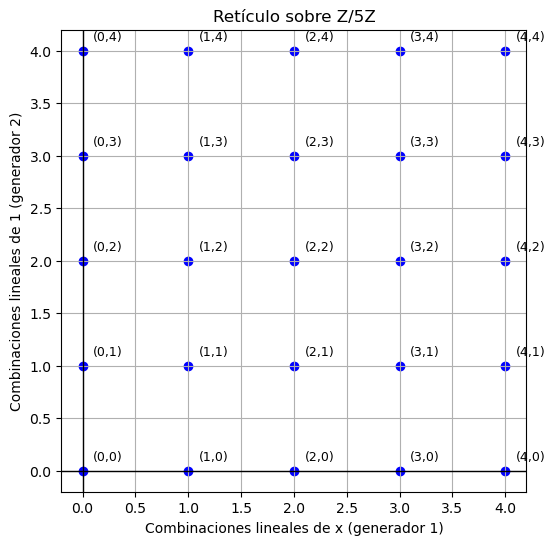

¿x + 1 pertenece al retículo? True


In [107]:
# Crear un anillo de polinomios sobre Z/5Z
ring_poly_mod5 = PolynomialRing(QuotientRing(5))

# Generadores del retículo
generators_poly_5 = [
    [1, 0],  # x
    [0, 1]   # 1
]

# Crear el retículo
lattice_poly_5 = LatticeOverRing(ring_poly_mod5, generators_poly_5)

# Mostrar el retículo
lattice_poly_5.display_lattice()

# Verificar si un polinomio pertenece al retículo
test_poly_5 = [1, 1]  # x + 1
print("¿x + 1 pertenece al retículo?", lattice_poly_5.is_element_in_lattice(test_poly_5))
